In [26]:
import cmlreaders as cml
import mne
import numpy as np
import pandas as pd
pd.options.display.max_columns=None
import os
from scipy.io import loadmat
# from ScalpBIDSConverter import *
%matplotlib inline

In [3]:
sublists = loadmat("sublists_all.mat")

In [4]:
np.hstack(sublists['ltpfrsubs'][:, 0]).shape

(172,)

In [9]:
peers1_subjects = [
'LTP063', 'LTP064', 'LTP065', 'LTP066', 'LTP067', 'LTP069', 'LTP070', 'LTP073',
'LTP074', 'LTP075', 'LTP076', 'LTP077', 'LTP079', 'LTP081', 'LTP082', 'LTP084',
'LTP085', 'LTP086', 'LTP087', 'LTP088', 'LTP089', 'LTP090', 'LTP091', 'LTP092', 
'LTP093', 'LTP094', 'LTP095', 'LTP096', 'LTP098', 'LTP099', 'LTP100', 'LTP101', 
'LTP102', 'LTP103', 'LTP104', 'LTP105', 'LTP106', 'LTP107', 'LTP108', 'LTP110', 
'LTP111', 'LTP112', 'LTP113', 'LTP114', 'LTP115', 'LTP117', 'LTP118', 'LTP119', 
'LTP120', 'LTP122', 'LTP123', 'LTP124', 'LTP125', 'LTP127', 'LTP128', 'LTP130', 
'LTP131', 'LTP132', 'LTP133', 'LTP134', 'LTP135', 'LTP136', 'LTP137', 'LTP138', 
'LTP139', 'LTP140', 'LTP141', 'LTP142', 'LTP143', 'LTP144', 'LTP145', 'LTP146',
'LTP147', 'LTP148', 'LTP149', 'LTP150', 'LTP151', 'LTP153', 'LTP155', 'LTP159',
'LTP166', 'LTP168', 'LTP174', 'LTP184', 'LTP185', 'LTP186', 'LTP187', 'LTP188',
'LTP189', 'LTP190', 'LTP191', 'LTP192', 'LTP193', 'LTP194', 'LTP195', 'LTP196', 
'LTP197', 'LTP198', 'LTP199', 'LTP200', 'LTP201', 'LTP202', 'LTP207', 'LTP209', 
'LTP210', 'LTP211', 'LTP212', 'LTP214', 'LTP215', 'LTP227', 'LTP228', 'LTP229', 
'LTP230', 'LTP231', 'LTP232', 'LTP233', 'LTP234', 'LTP235', 'LTP236', 'LTP237', 
'LTP238', 'LTP239', 'LTP240', 'LTP241', 'LTP242', 'LTP243', 'LTP244', 'LTP245', 
'LTP246', 'LTP247', 'LTP249', 'LTP250', 'LTP251', 'LTP252', 'LTP253', 'LTP254', 
'LTP256', 'LTP258', 'LTP259', 'LTP260', 'LTP261', 'LTP263', 'LTP264', 'LTP265',
'LTP267', 'LTP268', 'LTP269', 'LTP270', 'LTP271', 'LTP272', 'LTP273', 'LTP274', 
'LTP275', 'LTP276', 'LTP277', 'LTP278', 'LTP279', 'LTP280', 'LTP281', 'LTP282', 
'LTP283', 'LTP284', 'LTP285', 'LTP286', 'LTP287', 'LTP288', 'LTP289', 'LTP290', 
'LTP291', 'LTP292', 'LTP293', 'LTP294'
]
np.savetxt("ltpFR_subjects.txt", peers1_subjects, fmt="%s")

In [ ]:
egi_file = mne.io.read_raw_egi('/data8/eeg/scalp/ltp/ltpFR/LTP103/session_0/eeg/LTP103 20101007 1121.raw', preload=False)

Reading EGI header from /data8/eeg/scalp/ltp/ltpFR/LTP103/session_0/eeg/LTP103 20101007 1121.raw...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {sync} ...


/tmp/2885834.1.jupyter.q/ipykernel_16592/2443110635.py:1: RuntimeWarning: Did not find any event code with more than one event.
  egi_file = mne.io.read_raw_egi('/data8/eeg/scalp/ltp/ltpFR/LTP103/session_0/eeg/LTP103 20101007 1121.raw', preload=False)


In [57]:
newer_egi_file = mne.io.read_raw_egi('/data7/eeg/scalp/ltp/ltpFR/LTP288/session_0/eeg/LTP288 20140203 1300.1.raw', preload=False)

Reading EGI header from /data7/eeg/scalp/ltp/ltpFR/LTP288/session_0/eeg/LTP288 20140203 1300.1.raw...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {} ...


In [58]:
print(egi_file.ch_names)
print(newer_egi_file.ch_names)

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29', 'E30', 'E31', 'E32', 'E33', 'E34', 'E35', 'E36', 'E37', 'E38', 'E39', 'E40', 'E41', 'E42', 'E43', 'E44', 'E45', 'E46', 'E47', 'E48', 'E49', 'E50', 'E51', 'E52', 'E53', 'E54', 'E55', 'E56', 'E57', 'E58', 'E59', 'E60', 'E61', 'E62', 'E63', 'E64', 'E65', 'E66', 'E67', 'E68', 'E69', 'E70', 'E71', 'E72', 'E73', 'E74', 'E75', 'E76', 'E77', 'E78', 'E79', 'E80', 'E81', 'E82', 'E83', 'E84', 'E85', 'E86', 'E87', 'E88', 'E89', 'E90', 'E91', 'E92', 'E93', 'E94', 'E95', 'E96', 'E97', 'E98', 'E99', 'E100', 'E101', 'E102', 'E103', 'E104', 'E105', 'E106', 'E107', 'E108', 'E109', 'E110', 'E111', 'E112', 'E113', 'E114', 'E115', 'E116', 'E117', 'E118', 'E119', 'E120', 'E121', 'E122', 'E123', 'E124', 'E125', 'E126', 'E127', 'E128', 'E129', 'D255', 'sync', 'STI 014']
['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8',

In [69]:
converter = ScalpBIDSConverter("LTP313", "ltpFR2", 0)

['/data10/eeg/scalp/ltp/ltpFR2/LTP313/session_0/eeg/LTP313_20150930.2.raw'
 '/data10/eeg/scalp/ltp/ltpFR2/LTP313/session_0/eeg/LTP313_20150930.2.raw.txt'
 '/data10/eeg/scalp/ltp/ltpFR2/LTP313/session_0/eeg/LTP313_20150930_032836.mff'
 '/data5/eeg/scalp/ltp/ltpFR2/LTP313/session_0/eeg/LTP313_20150930_032836.mff']
/data10/eeg/scalp/ltp/ltpFR2/LTP313/session_0/eeg/LTP313_20150930.2.raw
Reading EGI header from /data10/eeg/scalp/ltp/ltpFR2/LTP313/session_0/eeg/LTP313_20150930.2.raw...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {} ...


/tmp/2888767.1.jupyter.q/ipykernel_104964/3915657005.py:70: RuntimeWarning: Did not find any event code with more than one event.
  raw = mne.io.read_raw_egi(self.raw_filepath, preload=False)


KeyError: 'stim_file'

## Main code

In [68]:
import os
from glob import glob
import shutil
import numpy as np
import mne_bids
import cmlreaders as cml
import mne

class UnknownElectrodeCapError(Exception):
    pass
class MultiplePathsError(FileExistsError):
    pass

class ScalpBIDSConverter:
    event_column_dict = {
        "ltpFR": ['answer', 'case', 'color_b', 'color_g', 'color_r', 'distractor', 'eegfile', 'eegoffset',
                  'experiment', 'final_distractor', 'final_math_correct', 'finalrecalled',
                  'font', 'intruded', 'intrusion', 'iscorrect', 'item_name', 'item_num', 'list', 'listtype',
                  'math_correct', 'montage', 'msoffset', 'mstime', 'phase', 'protocol', 'recalled', 'recog_conf',
                  'recog_resp', 'recog_rt', 'recognized', 'rectime', 'rej_time', 'rejected', 'resp', 'rt', 'serialpos',
                  'session', 'studytrial', 'subject', 'task', 'test', 'trial', 'type'],
        "ltpFR2": ['subject', 'experiment', 'session', 'trial', 'item_name', 'item_num',
                   'list', 'recalled', 'serialpos', 'answer', 'test_x', 'test_y', 'test_z']
    }
    def __init__(self, subject, experiment, session, root="/scratch/PEERS_BIDS/", overwrite=True):
        self.root = root
        self.subject = subject
        self.experiment = experiment
        self.session = session
        self.load_subject_info()
        self.raw_filepath = self.locate_raw_file()
        if self.raw_filepath.endswith(".bz2"):
            self.unzip_raw_files()
        self.file_type = os.path.splitext(self.raw_filepath)[1]
        self.raw_file = self.load_scalp_eeg()
        self.set_wordpool()
        self.events = self.load_events()
        self.write_bids(overwrite=overwrite)
    
    def locate_raw_file(self):
        # hacky way to find all matching files!
        raw_file = glob(f"/data[0-9]/eeg/scalp/ltp/{self.experiment}/{self.subject}/session_{self.session}/eeg/*.raw*") + \
                glob(f"/data1[0-2]/eeg/scalp/ltp/{self.experiment}/{self.subject}/session_{self.session}/eeg/*.raw*") + \
                glob(f"/data[0-9]/eeg/scalp/ltp/{self.experiment}/{self.subject}/session_{self.session}/eeg/*.bdf*") + \
                glob(f"/data1[0-2]/eeg/scalp/ltp/{self.experiment}/{self.subject}/session_{self.session}/eeg/*.bdf*") + \
                glob(f"/data[0-9]/eeg/scalp/ltp/{self.experiment}/{self.subject}/session_{self.session}/eeg/*.mff*") + \
                glob(f"/data1[0-2]/eeg/scalp/ltp/{self.experiment}/{self.subject}/session_{self.session}/eeg/*.mff*")
        if len(raw_file)==0:
            raise FileNotFoundError
        elif len(raw_file)>1:
            raw_file = [os.path.realpath(p) for p in raw_file]
            print(np.unique(raw_file))
            if len(np.unique(raw_file))>1:
                if np.unique(raw_file)[0].endswith(".raw"):
                    print(np.unique(raw_file)[0])
                    raw_file = np.unique(raw_file)[0]
                else:
                    raise MultiplePathsError(f"{raw_file}")
            else:
                raw_file = raw_file[0]
        else:
            raw_file = raw_file[0]
            print(f"Raw File Found:", raw_file)
        return raw_file
    
    def load_scalp_eeg(self):
        if self.file_type == ".bdf":
            raw = mne.io.read_raw_bdf(self.raw_filepath, stim_channel='Status', preload=False)
        elif self.file_type in (".raw", ".mff"):
            raw = mne.io.read_raw_egi(self.raw_filepath, preload=False)
        else:
            raise ValueError("Unknown File Extension:", self.file_type)
        self.sfreq = raw.info['sfreq']
        self.recording_start = raw.info['meas_date']
        return raw
    
    def unzip_raw_files(self):
        output_path = os.path.splitext(self.raw_filepath.replace(' ', '_'))[0]
        if not os.path.exists(output_path):
            success = os.system(f"bunzip2 -k '{self.raw_filepath}'") == 0
            if success:
                shutil.move(self.raw_filepath, output_path)
                self.raw_filepath = output_path
    
    def set_montage(self):
        if self.file_type == ".bdf":
            self.raw_file = self.raw_file.set_montage('biosemi128')
            self.raw_file.set_channel_types({'EXG1':'eog', 'EXG2':'eog', 'EXG3':'eog', 'EXG4':'eog',
                                             'EXG5':'misc', 'EXG6':'misc', 'EXG7':'misc', 'EXG8':'misc'})
        
        elif self.file_type in (".raw", ".mff"):
            self.raw_file.rename_channels({'E129': 'Cz'})
            if "cal+" in self.raw_file.ch_names:
                # GSN HydroCel caps
                self.raw_file.set_montage("montage_files/egi128_GSN_HydroCel.sfp")
                self.raw_file.set_channel_types({'E8': 'eog', 'E25': 'eog', 'E126': 'eog',
                           'E127': 'eog', 'Cz': 'misc'})
                ## peripheral [127 126]
            elif "sync" in self.raw_file.ch_names:
                # GSN 200 v2.1 caps
                self.raw_file.set_montage("montage_files/egi128_GSN_200.sfp")
                self.raw_file.set_channel_types({'E8': 'eog', 'E26': 'eog', 'E126': 'eog', 
                                            'E127': 'eog', 'Cz': 'misc'})
                ## peripheral [127 126 17 128 125 120 44 49 56 63 69 74 82 89 95 100 108 114]
            else:
                raise UnknownElectrodeCapError
        else:
            raise UnknownElectrodeCapError
            
    def set_wordpool(self):
        if self.experiment=='ltpFR':
            if self.subject <= 'LTP159':
                self.wordpool_file = "wordpools/wasnorm_wordpool.txt"
            else:
                self.wordpool_file = "wordpools/wasnorm_wordpool_less_exclusions.txt"
        elif np.isin(self.experiment, ["ltpFR2", "VFFR"]):
            self.wordpool_file = "wordpools/wasnorm_wordpool_576.txt"
        else:
            raise Exception("Wordpool not known for this experiment.")
    
    def load_events(self):
        reader = cml.CMLReader(self.subject, self.experiment, self.session)
        events = reader.load('events')
        events = events.rename(columns={"eegoffset":"sample", "type":"trial_type"})
        ## math distractor
        if "test" in events.columns:
            events[["test_x", "test_y", "test_z"]] = events['test'].apply(pd.Series)
            events = events.drop(columns=["test"])
        events['onset'] = events['sample'] / self.sfreq
        events['duration'] = "n/a"
        events['stim_file'][events.trial_type.str.contains("WORD")] = self.wordpool_file 
        events = events.fillna("n/a")
        events = events.replace("", "n/a")
        events = events.replace("-999", "n/a")
        events = events.replace(-999, "n/a")
        standard_cols = ['onset', 'duration', "trial_type", "sample", 'stim_file']
        cols_to_include = cls.event_column_dict[self.experiment]
        events = events[standard_cols + cols_to_include]
        return events
    
    def load_subject_info(self):
        pass
    
    def write_bids(self, temp_path="temp.edf", overwrite=True):
        bids_path = mne_bids.BIDSPath(subject=self.subject,
                                          session=str(self.session),
                                          task=self.experiment,
                                          datatype="eeg",
                                          root=self.root)
        if self.file_type != ".bdf":
            try:
                mne.export.export_raw(temp_path, self.raw_file)
                print("temp file created")
            except FileExistsError as e:
                print(e)
            edf_file = mne.io.read_raw_edf(temp_path, preload=False)
            mne_bids.write_raw_bids(
                edf_file,
                events_data=None,
                montage=self.raw_file.get_montage(),
                bids_path=bids_path,
                overwrite=overwrite
            )
            os.system(f"rm {temp_path}")
            print("temp file removed")
        else:
            mne_bids.write_raw_bids(
                self.raw_file,
                events_data=None,
                montage=self.raw_file.get_montage(),
                bids_path=bids_path,
                overwrite=overwrite
            )
        self.events.to_csv(os.path.join(bids_path.directory, bids_path.basename+"_events.tsv"),
                           sep="\t", index=False)
        

In [71]:
mne_bids.write_raw_bids?

Signature:
mne_bids.write_raw_bids(
    raw,
    bids_path,
    events_data=None,
    event_id=None,
    anonymize=None,
    format='auto',
    symlink=False,
    empty_room=None,
    allow_preload=False,
    montage=None,
    acpc_aligned=False,
    overwrite=False,
    verbose=None,
)
Docstring:
Save raw data to a BIDS-compliant folder structure.

.. warning:: * The original file is simply copied over if the original
               file format is BIDS-supported for that datatype. Otherwise,
               this function will convert to a BIDS-supported file format
               while warning the user. For EEG and iEEG data, conversion
               will be to BrainVision format; for MEG, conversion will be
               to FIFF.

             * ``mne-bids`` will infer the manufacturer information
               from the file extension. If your file format is non-standard
               for the manufacturer, please update the manufacturer field
               in the sidecars manuall

## Events

In [65]:
np.isin(exclusions, peers1_events['item_name'])

array([False, False,  True, False, False, False, False,  True,  True,
       False, False,  True,  True, False,  True,  True, False, False,
        True,  True, False,  True,  True, False,  True,  True, False,
        True, False,  True,  True,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False,  True,  True, False, False, False,  True,
        True, False,  True,  True, False, False,  True,  True, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False,  True, False,  True, False,  True,  True, False,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
       False,  True, False, False,  True,  True,  True, False, False,
        True,  True, False, False,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False, False, False])

In [64]:
peers1_events = cml.CMLReader.load_events("LTP360", "ltpFR2")

In [45]:
np.unique(peers1_events[['color_r', 'color_g', 'color_b']])

array([-9.99000000e+02,  0.00000000e+00,  4.12841797e-01,  4.22607422e-01,
        5.77636719e-01,  5.86914062e-01,  1.00000000e+00])

In [38]:
np.unique(peers1_events['type'])

array(['FFR_REC_WORD', 'FFR_REC_WORD_VV', 'KEY_MSG', 'PROB', 'RECOG_CONF',
       'RECOG_LURE', 'RECOG_RESP', 'RECOG_RESP_VV', 'RECOG_TARGET',
       'REC_START', 'REC_WORD', 'REC_WORD_VV', 'REST_REWET', 'SESS_END',
       'SESS_START', 'SLOW_MSG', 'START', 'STOP', 'WORD'], dtype=object)

In [22]:
np.unique(events.trial_type)

array(['DISTRACTOR', 'PROB', 'REC_START', 'REC_WORD', 'REC_WORD_VV',
       'REST_REWET', 'SESS_END', 'SESS_START', 'START', 'STOP', 'WORD'],
      dtype=object)

In [41]:
events.columns

Index(['onset', 'duration', 'trial_type', 'sample', 'answer',
       'begin_distractor', 'begin_math_correct', 'eegfile', 'eogArtifact',
       'experiment', 'final_distractor', 'final_math_correct', 'intruded',
       'intrusion', 'iscorrect', 'item_name', 'item_num', 'list', 'montage',
       'msoffset', 'mstime', 'phase', 'protocol', 'recalled', 'rectime',
       'serialpos', 'session', 'subject', 'trial', 'test_x', 'test_y',
       'test_z'],
      dtype='object')

In [25]:
events.query("trial_type=='PROB'")

,onset,duration,trial_type,sample,answer,begin_distractor,begin_math_correct,eegfile,eogArtifact,experiment,final_distractor,final_math_correct,intruded,intrusion,iscorrect,item_name,item_num,list,montage,msoffset,mstime,phase,protocol,recalled,rectime,serialpos,session,subject,trial,test_x,test_y,test_z
2,416.072,n/a,PROB,208036,18,-999,-999,/protocols/ltp/subjects/LTP313/experiments/ltp...,-1,ltpFR2,-999,-999,-999,-999,1,n/a,-999,-1,0,1,1443641732114,n/a,ltp,-999,3632,-999,0,LTP313,-999,8,1,9
3,419.742,n/a,PROB,209871,26,-999,-999,/protocols/ltp/subjects/LTP313/experiments/ltp...,-1,ltpFR2,-999,-999,-999,-999,1,n/a,-999,-1,0,1,1443641735784,n/a,ltp,-999,3994,-999,0,LTP313,-999,9,8,9
4,423.778,n/a,PROB,211889,18,-999,-999,/protocols/ltp/subjects/LTP313/experiments/ltp...,-1,ltpFR2,-999,-999,-999,-999,1,n/a,-999,-1,0,1,1443641739820,n/a,ltp,-999,1775,-999,0,LTP313,-999,6,5,7
8,488.398,n/a,PROB,244199,9,-999,-999,/protocols/ltp/subjects/LTP313/experiments/ltp...,-1,ltpFR2,-999,-999,-999,-999,1,n/a,-999,1,0,1,1443641804441,n/a,ltp,-999,2532,-999,0,LTP313,-999,1,2,6
9,490.982,n/a,PROB,245491,22,-999,-999,/protocols/ltp/subjects/LTP313/experiments/ltp...,-1,ltpFR2,-999,-999,-999,-999,1,n/a,-999,1,0,1,1443641807025,n/a,ltp,-999,2605,-999,0,LTP313,-999,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,5783.556,n/a,PROB,2891778,11,-999,-999,/protocols/ltp/subjects/LTP313/experiments/ltp...,-1,ltpFR2,-999,-999,-999,-999,1,n/a,-999,36,0,1,1443647099708,n/a,ltp,-999,960,-999,0,LTP313,-999,3,7,1
1560,5784.558,n/a,PROB,2892279,16,-999,-999,/protocols/ltp/subjects/LTP313/experiments/ltp...,-1,ltpFR2,-999,-999,-999,-999,1,n/a,-999,36,0,1,1443647100710,n/a,ltp,-999,2646,-999,0,LTP313,-999,4,5,7
1561,5787.260,n/a,PROB,2893630,14,-999,-999,/protocols/ltp/subjects/LTP313/experiments/ltp...,-1,ltpFR2,-999,-999,-999,-999,1,n/a,-999,36,0,1,1443647103413,n/a,ltp,-999,1454,-999,0,LTP313,-999,9,4,1
1562,5788.758,n/a,PROB,2894379,18,-999,-999,/protocols/ltp/subjects/LTP313/experiments/ltp...,-1,ltpFR2,-999,-999,-999,-999,1,n/a,-999,36,0,1,1443647104911,n/a,ltp,-999,980,-999,0,LTP313,-999,9,1,8


In [5]:
converter.events[['test',explodeorrect', 'answer']]

,test,iscorrect,answer
0,"[0, 0, 0]",-999,-999
1,"[-999, -999, -999]",-999,-999
2,"[8, 1, 9]",1,18
3,"[9, 8, 9]",1,26
4,"[6, 5, 7]",1,18
...,...,...,...
1577,"[0, 0, 0]",-999,-999
1578,"[0, 0, 0]",-999,-999
1579,"[0, 0, 0]",-999,-999
1580,"[0, 0, 0]",-999,-999


### Montage peculiarities

In [53]:
gsn_200 = mne.channels.read_custom_montage("/home1/jrudoler/scalp_caps/egi128_GSN_renamed_fiducials.sfp")
gsn_HC = mne.channels.read_custom_montage("/home1/jrudoler/scalp_caps/egi128_GSN_HydroCel_renamed_fiducials.sfp")

In [178]:
gsn_HC

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 129 channels>

In [124]:
len(gsn_HC.ch_names)

133

Creating RawArray with float64 data, n_channels=128, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


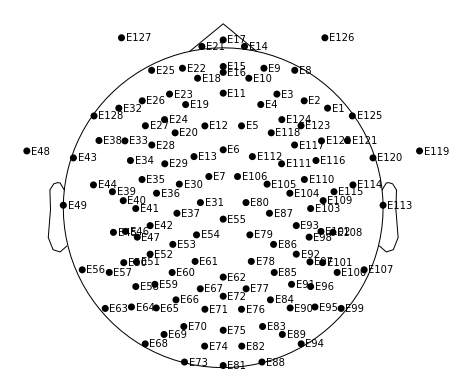

In [49]:
plot1 = montage_hydrocel.plot()
_ = mne.channels.make_standard_montage('GSN-HydroCel-128').plot()

Creating RawArray with float64 data, n_channels=129, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


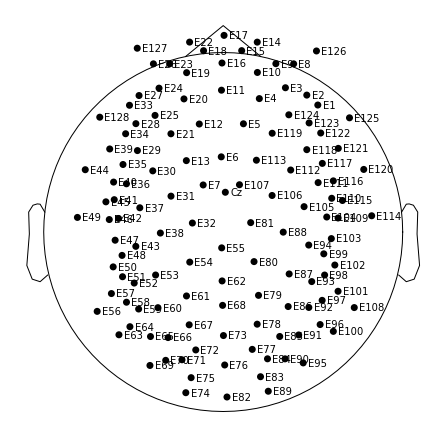

In [54]:
plot1 = gsn_200.plot()

Creating RawArray with float64 data, n_channels=129, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


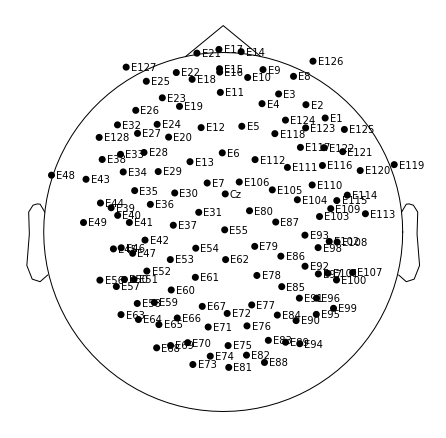

In [55]:
plot2 = gsn_HC.plot()

1 duplicate electrode labels found:
E129/Cz
Plotting 132 unique labels.
Creating RawArray with float64 data, n_channels=132, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


/tmp/2879937.1.jupyter.q/ipykernel_13328/1721660602.py:1: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  plot2 = gsn_200.plot()


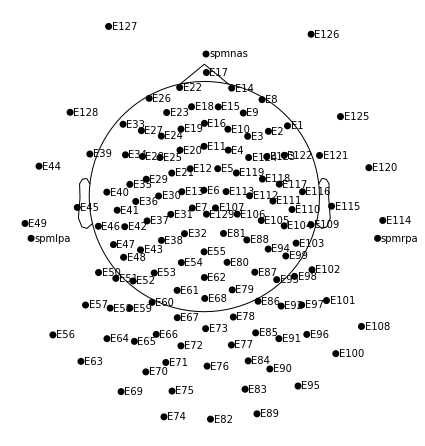

In [50]:
plot2 = gsn_200.plot()

In [117]:
montage_hydrocel = mne.channels.make_standard_montage('GSN-HydroCel-129')

In [168]:
montage_hydrocel.add_estimated_fiducials?

Signature:
montage_hydrocel.add_estimated_fiducials(
    subject,
    subjects_dir=None,
    verbose=None,
)
Docstring:
Estimate fiducials based on FreeSurfer ``fsaverage`` subject.

This takes a montage with the ``mri`` coordinate frame,
corresponding to the FreeSurfer RAS (xyz in the volume) T1w
image of the specific subject. It will call
:func:`mne.coreg.get_mni_fiducials` to estimate LPA, RPA and
Nasion fiducial points.

Parameters
----------

subject : str
    The FreeSurfer subject name.

subjects_dir : str | pathlib.Path | None
    The path to the directory containing the FreeSurfer subjects
    reconstructions. If ``None``, defaults to the ``SUBJECTS_DIR`` environment
    variable.

verbose : bool | str | int | None
    Control verbosity of the logging output. If ``None``, use the default
    verbosity level. See the :ref:`logging documentation <tut-logging>` and
    :func:`mne.verbose` for details. Should only be passed as a keyword
    argument.

Returns
-------
inst : instan

In [198]:
pos_dict = montage_hydrocel.get_positions()['ch_pos']
gsn_HC_standard_positions = np.stack([pos_dict[k] for k in pos_dict])

In [197]:
pos_dict = gsn_HC.get_positions()['ch_pos']
gsn_HC_custom_positions = np.stack([pos_dict[k] for k in pos_dict])

In [207]:
trans, resid, rank, s = np.linalg.lstsq(gsn_HC_custom_positions, gsn_HC_standard_positions, rcond=None)

In [218]:
gsn_HC.apply_trans(mne.transforms.Transform("unknown", "unknown", trans=trans), verbose=True)

ValueError: Transformation must be shape (4, 4) not (3, 3)

In [56]:
import os
montage_dir = os.path.join(os.path.dirname(mne.__file__),
                           'channels', 'data', 'montages')
print('\nBUILT-IN MONTAGE FILES')
print('======================')
print(sorted(os.listdir(montage_dir)))


BUILT-IN MONTAGE FILES
['EGI_256.csd', 'GSN-HydroCel-128.sfp', 'GSN-HydroCel-129.sfp', 'GSN-HydroCel-256.sfp', 'GSN-HydroCel-257.sfp', 'GSN-HydroCel-32.sfp', 'GSN-HydroCel-64_1.0.sfp', 'GSN-HydroCel-65_1.0.sfp', 'artinis-brite23.elc', 'artinis-octamon.elc', 'biosemi128.txt', 'biosemi16.txt', 'biosemi160.txt', 'biosemi256.txt', 'biosemi32.txt', 'biosemi64.txt', 'easycap-M1.txt', 'easycap-M10.txt', 'mgh60.elc', 'mgh70.elc', 'standard_1005.elc', 'standard_1020.elc', 'standard_alphabetic.elc', 'standard_postfixed.elc', 'standard_prefixed.elc', 'standard_primed.elc']


In [6]:
egi_file.ch_names

NameError: name 'egi_file' is not defined

In [38]:
egi_file.get_montage()

In [39]:
egi_file.set_montage('GSN-HydroCel-129')

ValueError: DigMontage is only a subset of info. There are 1 channel position not present in the DigMontage. The required channels are:

['E129'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.

In [46]:
events = reader.load("events")
events

,eegoffset,case,color_b,color_g,color_r,distractor,eegfile,eogArtifact,experiment,final_distractor,...,rejected,resp,rt,serialpos,session,studytrial,subject,task,trial,type
0,-1,,-999,-999.0,-999.0,-999,,-1,ltpFR,-999,...,0,-999,2711,-999,0,-999,LTP156,-999,-999,SESS_START
1,-1,upper,1,1.0,1.0,0,,-1,ltpFR,0,...,0,-1,1450,1,0,-999,LTP156,-1,1,WORD
2,-1,upper,1,1.0,1.0,0,,-1,ltpFR,0,...,0,-1,-999,2,0,-999,LTP156,-1,1,WORD
3,-1,upper,1,1.0,1.0,0,,-1,ltpFR,0,...,0,-1,-999,3,0,-999,LTP156,-1,1,WORD
4,-1,upper,1,1.0,1.0,0,,-1,ltpFR,0,...,0,-1,-999,4,0,-999,LTP156,-1,1,WORD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,-1,,-999,-999.0,-999.0,-999,,-1,ltpFR,-999,...,0,-999,-999,-999,0,-999,LTP156,-999,16,RECOG_CONF
1372,-1,,-999,-999.0,-999.0,-999,,-1,ltpFR,-999,...,0,-999,-999,-999,0,-999,LTP156,-999,16,RECOG_LURE
1373,-1,,-999,-999.0,-999.0,-999,,-1,ltpFR,-999,...,0,-999,-999,-999,0,-999,LTP156,-999,16,RECOG_RESP
1374,-1,,-999,-999.0,-999.0,-999,,-1,ltpFR,-999,...,0,-999,-999,-999,0,-999,LTP156,-999,16,RECOG_CONF


In [29]:
eeg_reader = reader.get_reader('eeg')

In [101]:
events['eegfile'].iloc[0]

'/scratch/jrudoler/sandbox/protocols/ltp/subjects/LTP156/experiments/ltpFR/sessions/0/ephys/current_processed/LTP156 20110913 0850.1.raw'

In [45]:
reader.load_eeg(events[5:6], rel_start=0, rel_stop=100)

ValueError: No events found! Hint: did filtering events result in at least one?

In [88]:
reader.load_eeg(events.query("type=='WORD'"), rel_start=0, rel_stop=100)

FileNotFoundError: Unable to find the requested file in any of the expected locations:
 /protocols/ltp/subjects/LTP156/experiments/ltpFR/sessions/0/ephys/current_processed/sources.json
/data/eeg/LTP156/eeg.noreref/LTP156 20110913 0850.1.raw.params.txt
/data/eeg/LTP156/eeg.noreref/params.txt

In [28]:
events.query("type=='WORD'")

,eegoffset,case,color_b,color_g,color_r,distractor,eegfile,eogArtifact,experiment,final_distractor,...,rejected,resp,rt,serialpos,session,studytrial,subject,task,trial,type
1,806778,upper,1,1.000000,1.000000,0,/scratch/jrudoler/sandbox/protocols/ltp/subjec...,0,ltpFR,0,...,0,-1,1450,1,0,-999,LTP156,-1,1,WORD
2,808802,upper,1,1.000000,1.000000,0,/scratch/jrudoler/sandbox/protocols/ltp/subjec...,3,ltpFR,0,...,0,-1,-999,2,0,-999,LTP156,-1,1,WORD
3,810755,upper,1,1.000000,1.000000,0,/scratch/jrudoler/sandbox/protocols/ltp/subjec...,3,ltpFR,0,...,0,-1,-999,3,0,-999,LTP156,-1,1,WORD
4,812713,upper,1,1.000000,1.000000,0,/scratch/jrudoler/sandbox/protocols/ltp/subjec...,3,ltpFR,0,...,0,-1,-999,4,0,-999,LTP156,-1,1,WORD
5,814621,upper,1,1.000000,1.000000,0,/scratch/jrudoler/sandbox/protocols/ltp/subjec...,3,ltpFR,0,...,0,-1,-999,5,0,-999,LTP156,-1,1,WORD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,2298785,upper,0,0.586914,0.422607,0,/scratch/jrudoler/sandbox/protocols/ltp/subjec...,3,ltpFR,0,...,0,0,1122,12,0,-999,LTP156,1,16,WORD
365,2300793,lower,1,0.412842,0.577637,0,/scratch/jrudoler/sandbox/protocols/ltp/subjec...,3,ltpFR,0,...,0,1,2099,13,0,-999,LTP156,0,16,WORD
366,2302854,lower,1,0.412842,0.577637,0,/scratch/jrudoler/sandbox/protocols/ltp/subjec...,3,ltpFR,0,...,0,1,2048,14,0,-999,LTP156,0,16,WORD
367,2304896,lower,1,0.412842,0.577637,0,/scratch/jrudoler/sandbox/protocols/ltp/subjec...,3,ltpFR,0,...,0,1,1661,15,0,-999,LTP156,0,16,WORD


In [29]:
index

,all_events,experiment,import_type,math_events,original_session,session,subject,subject_alias,task_events
0,protocols/ltp/subjects/LTP156/experiments/ltpF...,ltpFR,build,protocols/ltp/subjects/LTP156/experiments/ltpF...,0,0,LTP156,LTP156,protocols/ltp/subjects/LTP156/experiments/ltpF...
1,protocols/ltp/subjects/LTP445/experiments/ltpR...,ltpRepFR,build,NaN,0,0,LTP445,LTP445,protocols/ltp/subjects/LTP445/experiments/ltpR...
2,protocols/ltp/subjects/LTP445/experiments/ltpR...,ltpRepFR,build,NaN,1,1,LTP445,LTP445,protocols/ltp/subjects/LTP445/experiments/ltpR...


In [30]:
events.columns

Index(['eegoffset', 'case', 'color_b', 'color_g', 'color_r', 'distractor',
       'eegfile', 'eogArtifact', 'experiment', 'final_distractor',
       'final_math_correct', 'finalrecalled', 'font', 'intruded', 'intrusion',
       'item_name', 'item_num', 'listtype', 'math_correct', 'montage',
       'msoffset', 'mstime', 'phase', 'protocol', 'recalled', 'recog_conf',
       'recog_resp', 'recog_rt', 'recognized', 'rectime', 'rej_time',
       'rejected', 'resp', 'rt', 'serialpos', 'session', 'studytrial',
       'subject', 'task', 'trial', 'type'],
      dtype='object')

Creating RawArray with float64 data, n_channels=129, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


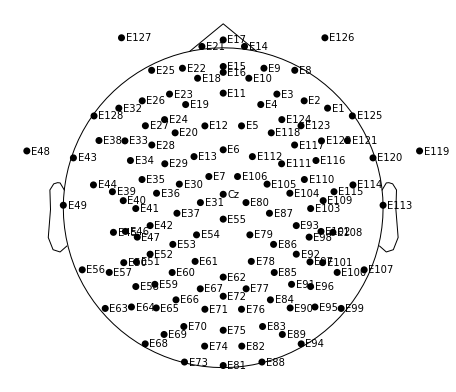

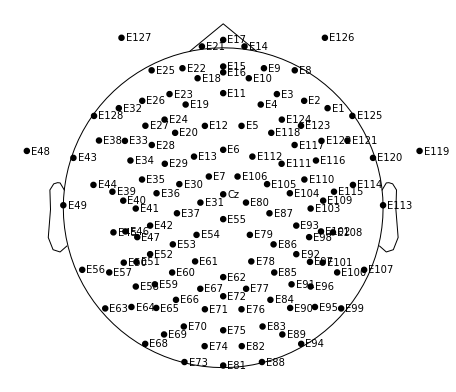

In [44]:
mne.channels.make_standard_montage("GSN-HydroCel-129").plot()

In [34]:
mne.channels.read_custom_montage("/home1/jrudoler/GSN-HydroCel-129.sfp")

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 129 channels>

In [38]:
mon = mne.channels.read_custom_montage("/home1/jrudoler/GSN-HydroCel-129.sfp")

Creating RawArray with float64 data, n_channels=129, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


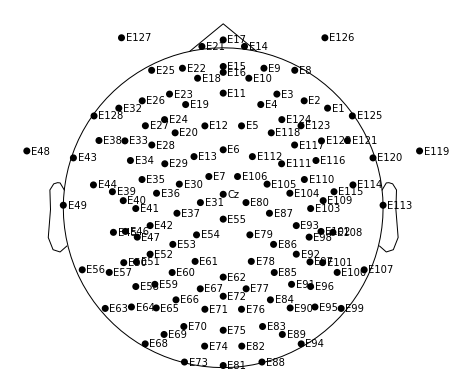

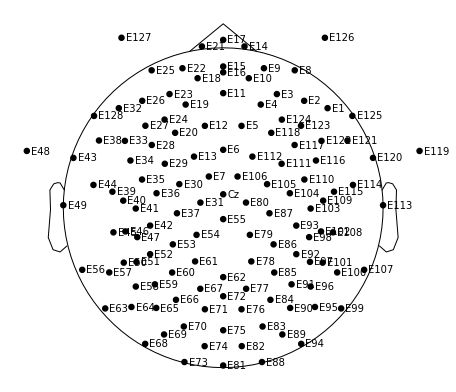

In [41]:
mon.plot()

# Events Descriptors

In [ ]:
subject: The string identifier of the subject, e.g. LTP123.
session: The session number (1 - 24). Please note: session directories are numbered from 0 to 23. Session 1 on an event is the same as session_0 in the file structure.
trial: List number (1-24) during which the event occurred.
type: The type of event
DISTRACTOR - The beginning of a math distractor period (encompasses the full 24s of distractor in one event)
REC_START - The beginning of a recall period
REC_WORD - A recall made by the participant
REST_REWET - Participant break/Cap rewet
WORD - Item presentation
serialpos: Indicates the serial position in which the word was presented during the study list
begin_distractor: 0 if there was no pre-list distractor on that trial, 24000 if there was (indicating a 24000 ms distractor)
begin_math_correct: Indicates the number of math problems the participant answered correctly during the pre-list distractor; NaN if no distractor
final_distractor: Always 24000, indicating that every trial had a 24000 ms post-list distractor period
final_math_correct: The number of math problems the participant answered correctly during the end-of-list distractor
item: The word being presented or recalled in a WORD or REC_WORD event.
itemno: The ID number of the presented or recalled word in the word pool (ranges from 1 through 1638)
recalled: 1 if the item was subsequently recalled, 0 if it was not
intruded: If the item was later recalled as a prior-list intrusion, indicates how many lists later it was recalled
rectime: On recall events, this indicates how many ms after the beginning of the recall period the word was vocalized
intrusion: Marks whether a recalled word is an intrusion
0: Indicates a correct recall
-1: Indicates an extra-list intrusion
n>0: Indicates a prior list intrusion, where n is number of lists back the word was presented
mstime: The Unix time of an event, in milliseconds
msoffset: Estimated maximum possible error of mstime
EEG Info:

eegfile: The path to the EEG data recorded during the event
eegoffset: The index of the first EEG sample recorded during the event Note: Indexing starts at 1 on MATLAB events, such that an eegoffset of 1 refers to the first EEG sample in the recording
artifactMS: If the participant blinked during the event, this indicates the number of milliseconds after the event onset that the blink began
artifactNum: If the participant blinked during the event, this indicates the number of EEG samples during the event that were contaminated by the blink
artifactFrac: If the participant blinked during the event, this indicates what fraction of EEG samples recorded during the event were contaminated
artifactMeanMS: If the participant blinked during the event, this indicates the average time (in milliseconds) after the start of the event that all contaminated samples occurred
badEvent: 1 if any channels were identified as containing one or more high-amplitude artifacts during the event Note: This does not indicate that the event's EEG data is unusable, only that certain channels may need to be excluded.
badEventChannel: Lists all channels that were identified as containing one or more high-amplitude artifacts during the event

In [33]:
np.unique(events['trial_type'])

array(['DISTRACTOR', 'PROB', 'REC_START', 'REC_WORD', 'REC_WORD_VV',
       'REST_REWET', 'SESS_END', 'SESS_START', 'START', 'STOP', 'WORD'],
      dtype=object)

In [ ]:
HED = {
    "onset": {
        "Description": "Onset (in seconds) of the event, measured from the beginning of the acquisition of the first data point stored in the corresponding task data file. ",
    },
    "subject": {
        "LongName": "Subject ID",
        "Description": "The string identifier of the subject, e.g. LTP123",
        
    },
    "session": {
        
        "Description": "The session number (1 - 24). Please note: \
                        session directories are numbered from 0 to 23. \
                        Session 1 on an event is the same as session_0 in the file structure.",
        "Levels": list(range(24))
    },
    "trial": {
        "LongName": "Trial Number",
        "Description": "Word list (1-24) during which the event occurred. Trial <= 0 indicates practice list.",
        "levels": list(range(24))
    },
    "trial_type": {
        "LongName": "Event category",
        "Description": "Indicator of type of task action that occurs at the marked time",
        "Levels": {
            "DISTRACTOR": "The beginning of a math distractor period",
            "REC_START": "The beginning of a recall period",
            "REC_WORD": "Onset of a recall made by the participant",
            "REC_WORD_VV": "Onset of a non-word vocalization made during recall.",
            "REST_REWET": "Participant break/Cap rewet",
            "WORD": "Item presentation",
            "SESS_START":"Marks the beginning of the session.",
            "SESS_END": "Marks the end of the session."
            
        }
    },
    "serialpos": {
        "LongName": "Serial Position",
        "Description": "Indicates the serial position in which the word was presented during the study list (WORD events).",
        "Levels": {
            np.arange(1,25,1,dtype=int): "For word and recall events, indicates the serial position of a word.",
            -999: "For recall events, indicates an intrusion, otherwise that this column attribute is non-applicable to the event type in question."
        }
    },
    "intrusion": {
        "Description": "Marks whether a recalled word is an intrusion",
        "Levels": {
            -999: "Indicates that the column attribute is not applicable to the event type in question.",
            0: "Indicates a correct recall.",
            -1: "For recall events, indicates an Extra-List Intursion; for vocalization events indicates a vocalization. ",
            np.arange(1,24,1,dtype=int): "Indicates a Prior List Intrusion, where n is the number of lists back the word was presented.",
        }
    },
    "Intruded": {
        "Description": "If the item was later recalled as a Prior-List Intrusion, indicates how many lists later it was recalled within a given session.",
        "Levels": {
            0: "For word events, indicates that the item was not later recalled as a Prior-List Intrusion and otherwise, that the attribute is not applicable to a given event type.",
            np.arange(1,24,1,dtype=int): "Indicates how many lists later the item was intruded."
        }
    },
    "begin_distractor": {
        "Description": "indicates the length of the pre-list math distractor for a given trial.",
        "Levels": {
            -999: "Indicates that this attribute is not applicable to the event type in question or an intrusion in REC_WORD events.",
            0: "indicates no pre-list math distractor for a given WORD_REC event.",
            1: "", 
            24000: "indicates a 24000 ms pre-list math distractor on that trial",
        }
    },
    "begin_math_correct": {
        "Description":"Indicates the number of math problems the participant answered correctly during the pre-list distractor.",
        "Levels": {
            -999: "Indicates that the attribute is not applicable to the event type in question, or no pre-list distractor if it is a WORD event.",
            int: "the number of correct math problem during pre-list distractor",
            
        }
    },
    "final_distractor": {
            "Description": "indicates length of the post-trial distractor",
            "Levels": {
                -999: "Indicates that final_distractor is not applicable to the event type in question.",
                24000: "Indicates the length of the post-list distractor in ms.",
                1: "" #????
            }
    },
    "final_math_correct": {
        "Description": "Indicates the number of math problems the participant answered correcly during the post-list distractor.",
        "Levels": {
            int: "",
            -999: "Indicates that the attribute is not applicable to the event type in question."
        }
    },
    "item_name": {
        "Description": "The word being presented or recalled in a WORD or REC_WORD event."
    },
    "item_num": {
        "LongName": "Item number",
        "Description": "The ID number of the presented or recalled word in the word pool.",
        "Levels": {
            np.arange(1,1639,1,dtype=int): "ID number of a given word in the word pool.",
            -1: "In REC_WORD events, indicates an Extra-List Intrusion; in REC_WORD_VV indicates a vocalization.",
            -999: "Indicates that the attribute is not applicable to the event type in question."
        }
    },
    "rectime": {
        "LongName": "Recall time",
        "Description": "",
        "Levels": {
            int: "Recall time for recall events in ms.",
            -999: "Indicates that recall time is not applicable to the event type in question"
        }
    }
}

In [ ]:
import json

with open("events.json", "w") as f:
    json.dump(fp=f, obj = HED)